### [판매부스 쓰레기 관찰 진행 방법]
- 데이터명 : trash_data
- 목적 : 주로 음식부스에서 쓰레기의 종류와 양을 파악한다.
- 방법 
1) 무작위로 2개 이상 관찰할 부스를 선정한 뒤 방문자 수를 셀 수 있는 위치로 이동한다. 
2) 사전에 어떤 메뉴를 판매하고 있는지 파악하고, 각 메뉴 1개 구매 시 어떤 쓰레기가 나온는지 파악한다.
3) 정해진 시간동안 부스에 방문한 인원를 세고, 각각 받은 음식 어떤 것인지 기록한다.

(사전) 떡볶이 : 종이 그릇, 비닐, 이쑤시개, 냅킨
    + 에이드 : 플라스틱컵, 플라스틱뚜껑, 빨대, 종이홀더  
(관찰 중) 방문자 5명, 떡볶이 3접시, 에이드 4잔

4) 모니터링이 끝나면 표시한 메뉴 갯수를 바탕으로 어떤 일회용품이 나왔는지 파악한다.

(예) 떡볶이(종이 그릇, 비닐, 이쑤시개, 냅킨) 4개 + 에이드(플라스틱컵, 플라스틱뚜껑, 빨대, 종이홀더 ) 4개 = 총 8개
 부침개(일회용접시, 일회용젓가락, 일회용간장종지, 물티슈, 일회용종이컵) 5개 + 막걸리(막걸리통, 일회용종이컵) 2개 = 총7개 

 5) 그 후 총 일회용품 쓰레기 갯수 / 방문자 수로 행사장 내 하루 1인 쓰레기 배출량의 평균을 구한다.

In [95]:
import pandas as pd

trash_data = pd.read_excel("C:/Users/sori4/Downloads/포폴작성/음식부스 쓰레기 관찰.xlsx")
trash_data

,타임스탬프,활동명,방문축제,메뉴별 사용하는 일회용품 종류,쓰레기 배출량
0,2023-08-12 23:13:26.722,경희,jump,"새우튀김 : 종이그릇, 이쑤시개\n피자: 종이그릇",새우튀김 2개. 피자 1개. 일인당 1.5개
1,2023-08-13 17:31:41.278,임윤,전주 얼티밋 뮤직 페스티벌 8.13,"찹살떡 : 종이 박스, 플라스틱 포크","종이 박스 1개+플라스틱 포크 2개, 총 3개 1인 하루 쓰레기 사용량 평균 1.5개"
2,2023-08-13 18:19:03.203,안홍원,전주얼티밋페스티벌,"종이 그릇, 플라스틱 포크","타코야끼(종이 그릇, 이쑤시개,냅킨)+맥주(플라스틱컵)=4개"
3,2023-08-13 18:26:51.667,김슬기,2023 전주 얼티밋 뮤직 페스티벌,닭강정: 종이그릇 이쑤시개 /콜라:페트병\n타코야끼: 종이그릇 이쑤시개 /에이드:플...,닭강정: 종이그릇 이쑤시개 /콜라:페트병 타코야끼: 종이그릇 이쑤시개2 /에이드:플...
4,2023-08-13 19:40:25.737,장윤정,전주점프축제,"피자: 종이박스, 비닐, 플라스틱포크\n화채: 플라스틱그릇, 플라스틱 숟가락, 비닐","화채(플라스틱 그릇, 플라스틱 숟가락, 비닐)+에이드(플라스틱컵, 플라스틱 뚜껑, ..."
...,...,...,...,...,...
60,2023-10-20 09:48:18.492,시리,임실치즈축제,"탕후루: 꼬치, 휴지, 일회용종이컵(작은거)",탕후루(3개)
61,2023-10-20 16:01:02.932,버디,임실치즈축제,커피 : 플라스틱컵\n양꼬치 : 꼬치,2개
62,2023-10-20 16:02:06.115,버디,전주독서대전,"없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)","없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)"
63,2023-10-20 16:13:44.359,알드,전주독서대전,탕후루 꼬치,탕후루 꼬치


In [96]:
trash_data['활동명'].nunique()

48

### trash_data 1차 전처리

In [97]:
#활동명 삭제
trash_data.drop(columns='활동명', inplace=True)

#날짜 데이터 수정
trash_data['타임스탬프'] = trash_data['타임스탬프'].dt.strftime('%Y-%m-%d')
trash_data.rename(columns = {'타임스탬프' : '날짜'}, inplace=True)

In [98]:
#방문축제 데이터명 통일
trash_data['방문축제'].unique()

array(['jump', '전주 얼티밋 뮤직 페스티벌 8.13', '전주얼티밋페스티벌', '2023 전주 얼티밋 뮤직 페스티벌',
       '전주점프축제', '점프', '2023 JUMF', '자원봉사', '가맥축제', '전주가맥축제', '익산서동축제',
       '전주소리축제', '전주세계소리축제 ', '전주세계소리축제', '완주청년맥주축제 ', '진안홍삼축제',
       '전주대 문융대×경영대 축제, Day off in the air', '남원 세계드론제전', '완주와일드푸드축제 ',
       '완주와일드푸드축제', '완주와일드앤로컬푸드축제', '김제지평선축제 ', '김제지평선축제', '임실엔치즈축제',
       '임실치즈축제 ', '임실치즈축제', '산청약초축제', '완주 와일드푸드축제', '전주독서대전', '전주 독서 대전',
       '전주독서대전(23.10.13(금))', '순창고추장축제'], dtype=object)

In [99]:
#띄어쓰기 삭제
trash_data['방문축제'] = trash_data['방문축제'].str.strip()
trash_data['방문축제'].unique()

array(['jump', '전주 얼티밋 뮤직 페스티벌 8.13', '전주얼티밋페스티벌', '2023 전주 얼티밋 뮤직 페스티벌',
       '전주점프축제', '점프', '2023 JUMF', '자원봉사', '가맥축제', '전주가맥축제', '익산서동축제',
       '전주소리축제', '전주세계소리축제', '완주청년맥주축제', '진안홍삼축제',
       '전주대 문융대×경영대 축제, Day off in the air', '남원 세계드론제전', '완주와일드푸드축제',
       '완주와일드앤로컬푸드축제', '김제지평선축제', '임실엔치즈축제', '임실치즈축제', '산청약초축제',
       '완주 와일드푸드축제', '전주독서대전', '전주 독서 대전', '전주독서대전(23.10.13(금))',
       '순창고추장축제'], dtype=object)

In [100]:
for index, row in trash_data.iterrows():
    if '얼티밋' in row['방문축제'] or '점프' in row['방문축제']:
        trash_data.at[index, '방문축제'] = '전주점프축제'
    elif '와일드' in row['방문축제']:
        trash_data.at[index, '방문축제'] = '완주와푸축제'
    elif '독서' in row['방문축제']:
        trash_data.at[index, '방문축제'] = '전주독서대전'
    elif '가맥' in row['방문축제']:
        trash_data.at[index, '방문축제'] = '전주가맥축제'

trash_data['방문축제'].unique()

array(['jump', '전주점프축제', '2023 JUMF', '자원봉사', '전주가맥축제', '익산서동축제',
       '전주소리축제', '전주세계소리축제', '완주청년맥주축제', '진안홍삼축제',
       '전주대 문융대×경영대 축제, Day off in the air', '남원 세계드론제전', '완주와푸축제',
       '김제지평선축제', '임실엔치즈축제', '임실치즈축제', '산청약초축제', '전주독서대전', '순창고추장축제'],
      dtype=object)

In [101]:
#1개 혹은 짜잘한 것 손으로 수정
trash_data['방문축제'] = trash_data['방문축제'].replace({'jump': '전주점프축제', '2023 JUMF': '전주점프축제', '전주소리축제': '전주세계소리축제', '전주대 문융대×경영대 축제, Day off in the air':'전주대축제', '임실엔치즈축제': '임실치즈축제'})

trash_data['방문축제'].unique()

array(['전주점프축제', '자원봉사', '전주가맥축제', '익산서동축제', '전주세계소리축제', '완주청년맥주축제',
       '진안홍삼축제', '전주대축제', '남원 세계드론제전', '완주와푸축제', '김제지평선축제', '임실치즈축제',
       '산청약초축제', '전주독서대전', '순창고추장축제'], dtype=object)

In [102]:
#이상데이터 확인
trash_data[trash_data['방문축제'] == '자원봉사'] #수기작성 관련하여 삭제

,날짜,방문축제,메뉴별 사용하는 일회용품 종류,쓰레기 배출량
8,2023-08-14,자원봉사,익산 생크림 찹쌀떡. 일회용 포크. 일회용 접시등,수기 작성후 제출
13,2023-08-18,자원봉사,수기작성,수기작성


In [103]:
#'\n'을 기준으로 나눠 1개 행을 2개 행으로 바꾸려고 함
copy = trash_data.copy()

#리스트를 분해하여 새로운 행만들기
tdf = copy['메뉴별 사용하는 일회용품 종류'].apply(lambda x: x.split('\n')).explode().reset_index()

#같은 셀에 있던 데이터에 같은 행 붙이기
for idx, rows in copy.iterrows():
    tdf.loc[tdf['index'] == idx, '날짜'] = rows['날짜']
    tdf.loc[tdf['index'] == idx, '방문축제'] = rows['방문축제']
    tdf.loc[tdf['index'] == idx, '쓰레기 배출량'] = rows['쓰레기 배출량']


tdf

,index,메뉴별 사용하는 일회용품 종류,날짜,방문축제,쓰레기 배출량
0,0,"새우튀김 : 종이그릇, 이쑤시개",2023-08-12,전주점프축제,새우튀김 2개. 피자 1개. 일인당 1.5개
1,0,피자: 종이그릇,2023-08-12,전주점프축제,새우튀김 2개. 피자 1개. 일인당 1.5개
2,1,"찹살떡 : 종이 박스, 플라스틱 포크",2023-08-13,전주점프축제,"종이 박스 1개+플라스틱 포크 2개, 총 3개 1인 하루 쓰레기 사용량 평균 1.5개"
3,2,"종이 그릇, 플라스틱 포크",2023-08-13,전주점프축제,"타코야끼(종이 그릇, 이쑤시개,냅킨)+맥주(플라스틱컵)=4개"
4,3,닭강정: 종이그릇 이쑤시개 /콜라:페트병,2023-08-13,전주점프축제,닭강정: 종이그릇 이쑤시개 /콜라:페트병 타코야끼: 종이그릇 이쑤시개2 /에이드:플...
...,...,...,...,...,...
106,61,양꼬치 : 꼬치,2023-10-20,임실치즈축제,2개
107,62,"없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)",2023-10-20,전주독서대전,"없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)"
108,63,탕후루 꼬치,2023-10-20,전주독서대전,탕후루 꼬치
109,64,탕후루 꼬치+종이컵,2023-10-20,임실치즈축제,탕후루 꼬치 1개+종이컵 1개


In [104]:
# '/' 도 있기 때문에 한번 더
tdf2 = tdf['메뉴별 사용하는 일회용품 종류'].apply(lambda x: x.split('/')).explode().reset_index()

for idx, rows in tdf.iterrows():
    tdf2.loc[tdf2['index'] == idx, '날짜'] = rows['날짜']
    tdf2.loc[tdf2['index'] == idx, '방문축제'] = rows['방문축제']
    tdf2.loc[tdf2['index'] == idx, '쓰레기 배출량'] = rows['쓰레기 배출량']

tdf2

,index,메뉴별 사용하는 일회용품 종류,날짜,방문축제,쓰레기 배출량
0,0,"새우튀김 : 종이그릇, 이쑤시개",2023-08-12,전주점프축제,새우튀김 2개. 피자 1개. 일인당 1.5개
1,1,피자: 종이그릇,2023-08-12,전주점프축제,새우튀김 2개. 피자 1개. 일인당 1.5개
2,2,"찹살떡 : 종이 박스, 플라스틱 포크",2023-08-13,전주점프축제,"종이 박스 1개+플라스틱 포크 2개, 총 3개 1인 하루 쓰레기 사용량 평균 1.5개"
3,3,"종이 그릇, 플라스틱 포크",2023-08-13,전주점프축제,"타코야끼(종이 그릇, 이쑤시개,냅킨)+맥주(플라스틱컵)=4개"
4,4,닭강정: 종이그릇 이쑤시개,2023-08-13,전주점프축제,닭강정: 종이그릇 이쑤시개 /콜라:페트병 타코야끼: 종이그릇 이쑤시개2 /에이드:플...
...,...,...,...,...,...
114,106,양꼬치 : 꼬치,2023-10-20,임실치즈축제,2개
115,107,"없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)",2023-10-20,전주독서대전,"없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)"
116,108,탕후루 꼬치,2023-10-20,전주독서대전,탕후루 꼬치
117,109,탕후루 꼬치+종이컵,2023-10-20,임실치즈축제,탕후루 꼬치 1개+종이컵 1개


In [105]:
copy.iloc[6, 2]
#\n\n으로 2번 적용되어 빈칸 발생하였다. 이는 삭제한다.

'칠리새우: 종이박스1, 나무 젓가락1, 플라스틱컵, 플라스틱 뚜껑, 플라스틱 빨대, 냅킨, 종이홀더\n\n야키소바: 플라스틱 접시, 캔1, 물티슈, 플라스틱 포크'

In [106]:
tdf2[10:15]

,index,메뉴별 사용하는 일회용품 종류,날짜,방문축제,쓰레기 배출량
10,8,"피자:종이박스, 밑에 까는 유산지, 물티슈 + 맥주(플라스틱 )",2023-08-13,전주점프축제,평균 4개
11,9,"+ 소떡소떡 : 막대기, 종이접시, 물티슈+음료(플라스틱)",2023-08-13,전주점프축제,평균 4개
12,10,"칠리새우: 종이박스1, 나무 젓가락1, 플라스틱컵, 플라스틱 뚜껑, 플라스틱 빨대,...",2023-08-14,전주점프축제,"칠리새우: 종이박스1, 나무 젓가락2, 플라스틱컵, 플라스틱 뚜껑, 플라스틱 빨대,..."
13,11,,2023-08-14,전주점프축제,"칠리새우: 종이박스1, 나무 젓가락2, 플라스틱컵, 플라스틱 뚜껑, 플라스틱 빨대,..."
14,12,"야키소바: 플라스틱 접시, 캔1, 물티슈, 플라스틱 포크",2023-08-14,전주점프축제,"칠리새우: 종이박스1, 나무 젓가락2, 플라스틱컵, 플라스틱 뚜껑, 플라스틱 빨대,..."


In [107]:
tdf2.drop(index=13, inplace=True)

In [108]:
# ':'가 포함되어 있는지 확인하고 안전하게 분할하는 함수 정의
def split_item(x):
    parts = x.split(':')
    if len(parts) > 1:
        return parts[0], parts[1]
    else:
        return x, None

# '메뉴별 사용하는 일회용품 종류' 열을 기반으로 '메뉴'와 '일회용품' 열 생성
tdf2['메뉴'], tdf2['일회용품'] = zip(*tdf2['메뉴별 사용하는 일회용품 종류'].apply(split_item))

#순서변경 및 필요한 데이터만 추출
trash_data1 = tdf2[['날짜', '방문축제', '메뉴별 사용하는 일회용품 종류', '메뉴', '일회용품', '쓰레기 배출량']]
trash_data1

,날짜,방문축제,메뉴별 사용하는 일회용품 종류,메뉴,일회용품,쓰레기 배출량
0,2023-08-12,전주점프축제,"새우튀김 : 종이그릇, 이쑤시개",새우튀김,"종이그릇, 이쑤시개",새우튀김 2개. 피자 1개. 일인당 1.5개
1,2023-08-12,전주점프축제,피자: 종이그릇,피자,종이그릇,새우튀김 2개. 피자 1개. 일인당 1.5개
2,2023-08-13,전주점프축제,"찹살떡 : 종이 박스, 플라스틱 포크",찹살떡,"종이 박스, 플라스틱 포크","종이 박스 1개+플라스틱 포크 2개, 총 3개 1인 하루 쓰레기 사용량 평균 1.5개"
3,2023-08-13,전주점프축제,"종이 그릇, 플라스틱 포크","종이 그릇, 플라스틱 포크",None,"타코야끼(종이 그릇, 이쑤시개,냅킨)+맥주(플라스틱컵)=4개"
4,2023-08-13,전주점프축제,닭강정: 종이그릇 이쑤시개,닭강정,종이그릇 이쑤시개,닭강정: 종이그릇 이쑤시개 /콜라:페트병 타코야끼: 종이그릇 이쑤시개2 /에이드:플...
...,...,...,...,...,...,...
114,2023-10-20,임실치즈축제,양꼬치 : 꼬치,양꼬치,꼬치,2개
115,2023-10-20,전주독서대전,"없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)","없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)",None,"없음(탕후루-일회용품 제외함, 커피-다회용기 사용함)"
116,2023-10-20,전주독서대전,탕후루 꼬치,탕후루 꼬치,None,탕후루 꼬치
117,2023-10-20,임실치즈축제,탕후루 꼬치+종이컵,탕후루 꼬치+종이컵,None,탕후루 꼬치 1개+종이컵 1개


### 2차 전처리 (하드코딩)

In [109]:
#수기 작성으로 작성되어있는 것들은 삭제하고, 실제로 메뉴별 사용하는 일회용품 종류가 메뉴, 일회용품에 잘 배치되어있는지 확인, 안된 것들은 수정
#쓰레기 배출량도 동시에 수정

import warnings
warnings.filterwarnings("ignore")

#인덱스 리셋
trash_data1 = trash_data1.reset_index(drop=True)

In [110]:
trash_data1.head(20)

#1번 - 20번 처리
trash_data1.loc[3, '메뉴'] = '찹쌀떡'
trash_data1.loc[3, '일회용품'] = '종이 그릇, 플라스틱 포크'
trash_data1.loc[11, '메뉴'] = '소떡소떡'
trash_data1.loc[16, '방문축제'] = '전주점프축제' #날짜 및 메뉴로 확신
trash_data1.loc[16, '메뉴'] = trash_data1.loc[16, '메뉴별 사용하는 일회용품 종류'].split('.')[0]
trash_data1.loc[16, '일회용품'] = '종이 박스, 플라스틱 포크'
trash_data1.loc[17, '메뉴'] = '먹태'
trash_data1.loc[17, '일회용품'] = '종이컵, 비닐'

In [111]:
trash_data1.head(20)

#1번 - 20번 처리
trash_data1.loc[3, '메뉴'] = '찹쌀떡'
trash_data1.loc[3, '일회용품'] = '종이 그릇, 플라스틱 포크'
trash_data1.loc[11, '메뉴'] = '소떡소떡'
trash_data1.loc[16, '방문축제'] = '전주점프축제' #날짜 및 메뉴로 확신
trash_data1.loc[16, '메뉴'] = trash_data1.loc[16, '메뉴별 사용하는 일회용품 종류'].split('.')[0]
trash_data1.loc[16, '일회용품'] = '종이 박스, 플라스틱 포크'
trash_data1.loc[17, '메뉴'] = '먹태'
trash_data1.loc[17, '일회용품'] = '종이컵, 비닐'

In [112]:
trash_data1[21:40]

trash_data1.loc[22, '메뉴'] = trash_data1.loc[22, '메뉴별 사용하는 일회용품 종류'].split('-')[0]
trash_data1.loc[22, '일회용품'] = trash_data1.loc[22, '메뉴별 사용하는 일회용품 종류'].split('-')[1]
trash_data1.loc[24, '메뉴'] = '떡볶이'
trash_data1.loc[28, '메뉴'] = trash_data1.loc[28, '메뉴별 사용하는 일회용품 종류'].split('-')[0]
trash_data1.loc[28, '일회용품'] = trash_data1.loc[28, '메뉴별 사용하는 일회용품 종류'].split('-')[1]

In [113]:
# trash_data1[41:60]

#내용이 아예없는 행 삭제
# trash_data1.drop(index=54, inplace=True)

In [114]:
trash_data1[61:80]

trash_data1.loc[61, '쓰레기 배출량']

'우삼겹 쌀국수(종이그릇, 나무젓가락, 휴지) 백향과 에이드(플라스틱 컵, 뚜껑, 빨대) 1인 하루 쓰레기 사용량 6개 '

In [115]:
trash_data1.loc[61, '쓰레기 배출량'] = 6
trash_data1.loc[61, '일회용품'] = '나무젓가락, 플라스틱 그룻, 종이컵, 은박지, 막걸리통'
trash_data1.loc[71, '일회용품'] = '종이컵'
trash_data1.loc[71, '쓰레기 배출량'] = 1
trash_data1.loc[75, '쓰레기 배출량'] = 7

In [116]:
trash_data1[81:100]

trash_data1.loc[84, '메뉴'] = '떡볶이'
trash_data1.loc[84, '일회용품'] = '종이그릇, 비닐, 이쑤시개, 냅킨'
trash_data1.loc[72, '쓰레기 배출량'] = 1
trash_data1.loc[86, '메뉴'] = trash_data1.loc[86, '메뉴'].split('.')[1]
trash_data1.loc[87, '메뉴'] = '떡볶이'
trash_data1.loc[89,"쓰레기 배출량"] = 2
trash_data1.loc[91,"쓰레기 배출량"] = 5
trash_data1.loc[92,"쓰레기 배출량"] = 2
trash_data1.loc[93,"쓰레기 배출량"] = 5
trash_data1.loc[94,"쓰레기 배출량"] = 6
trash_data1.loc[96,"쓰레기 배출량"] = 6
trash_data1.loc[97,"쓰레기 배출량"] = 5
trash_data1.loc[98,"쓰레기 배출량"] = 5
trash_data1.loc[99,"쓰레기 배출량"] = 4
trash_data1.loc[100,"쓰레기 배출량"] = 4

In [117]:
trash_data1[100:]

#독서대전은 먹는 것은 아니지만, 쓰레기 측정하여 삽입
trash_data1.loc[104,"메뉴"] = '만들기'
trash_data1.loc[104,"일회용품"] = '물티슈, 손장갑, 버터용기, 플라스틱'
trash_data1.loc[105,"메뉴"] = '만들기'
trash_data1.loc[105,"일회용품"] = '종이컵, 종이, 플라스틱 컵, 종이봉투'
trash_data1.loc[109,"쓰레기 배출량"] = 1
trash_data1.loc[110,"쓰레기 배출량"] = 4

trash_data1.loc[114,"메뉴"] = '없음'
trash_data1.loc[114,"일회용품"] = '없음'
trash_data1.loc[114,"쓰레기 배출량"] = '없음'
trash_data1.loc[115,"메뉴"] = '탕후루'
trash_data1.loc[115,"일회용품"] = '꼬치'
trash_data1.loc[115,"쓰레기 배출량"] = 1
trash_data1.loc[116,"메뉴"] = '탕후루'
trash_data1.loc[116,"일회용품"] = '꼬치'
trash_data1.loc[116,"쓰레기 배출량"] = 2
trash_data1.loc[117,"메뉴"] = '탕후루'
trash_data1.loc[117,"일회용품"] = '꼬치'
trash_data1.loc[117,"쓰레기 배출량"] = 2

In [118]:
#75번 행 추가
trash_data1 = trash_data1.append({'날짜':'2023-10-09', '방문축제' : '김제지평선축제', '메뉴': '에이드','일회용품':'플라스틱컵, 플라스틱뚜껑, 빨대, 종이홀더', '쓰레기 배출량':7}, ignore_index=True)

In [119]:
#삭제 한번에
trash_data1.drop(index=23, inplace=True) #자원봉사 수기작성
trash_data1.drop(index=54, inplace=True) #진안홍삼축제 수집내용 없음
trash_data1.drop(index=89, inplace=True) #\n 빈칸

#인덱스 리셋
trash_data1 = trash_data1.reset_index(drop=True)

In [120]:
#이제 전처리를 마친 열을 삭제하자
trash_data1.drop(columns='메뉴별 사용하는 일회용품 종류', inplace=True)

trash_data2 = trash_data1.copy()

In [121]:
#쓰레기 배출량 정리
import re

trash_data2['쓰레기 배출량'] = trash_data2['쓰레기 배출량'].astype(str).str[-5:]
trash_data2['쓰레기 배출량'] = trash_data2['쓰레기 배출량'].apply(lambda x: ''.join(re.findall(r'[-+]?\d*\.\d+|\d+', x)))


r'[-+]?\d*\.\d+|\d+'는 정규 표현식입니다. 이 정규 표현식은 다음과 같은 패턴을 찾습니다:

[-+]?: 부호가 있거나 없는 것을 의미합니다. - 또는 +가 있거나 없을 수 있습니다.
\d*: 숫자가 0개 이상 나올 수 있습니다.
\.: 소수점을 나타냅니다.
\d+: 소수점 다음에는 숫자가 1개 이상 나와야 합니다.
|: 또는 연산자입니다. 이전 패턴 또는 이후 패턴 중 하나를 찾습니다.
\d+: 숫자가 1개 이상 나올 수 있습니다.

In [122]:
trash_data2 = trash_data2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [123]:
#trash_data2 빈칸 확인해서 채우기
trash_data2[trash_data2['쓰레기 배출량'] == '']

,날짜,방문축제,메뉴,일회용품,쓰레기 배출량
16,2023-08-14,전주점프축제,익산 생크림 찹쌀떡,"종이 박스, 플라스틱 포크",
17,2023-08-17,전주가맥축제,먹태,"종이컵, 비닐",
27,2023-08-19,전주가맥축제,게란말이,"스티로폼, 비닐, 젓가락, 마카로니비닐",
86,2023-10-10,임실치즈축제,탕후루,"나무꼬챙이, 작은종이컵",
87,2023-10-10,임실치즈축제,닭강정,"종이컵, 나무꼬치, 검은비닐봉투, 은박지",
111,2023-10-20,전주독서대전,없음,없음,


In [124]:
trash_data1.loc[87, '쓰레기 배출량']

'탕후루 : 나무꼬챙이 1개와 작은종이컵 1개 = 2개. 닭강정 : 종이컵 1개와 나무꼬치 4개 = 5개. 수제소시지 : 나무꼬챙이 1개와 종이접시 1개 = 2개. 여기에 닭강정이나 수제소시지의 경우 포장해가면 검정비닐봉투 1개와 은박지 1개 해서 2개 추가.'

In [125]:
trash_data2.loc[16,'쓰레기 배출량'] = 2
trash_data2.loc[17,'쓰레기 배출량'] = 2
trash_data2.loc[86, '쓰레기 배출량']=  2
trash_data2.loc[87, '쓰레기 배출량'] = 5

#쓰레기 발생하지 않은 데이터 삭제
trash_data2.drop(index=111, inplace=True)

In [126]:
eggs = trash_data2[trash_data2['메뉴'] == '계란말이'] #계란말이, 전주가맥축제 데이터의 '쓰레기 배출량'을 확인해서 그 내용 삽입

import numpy as np
eggs['쓰레기 배출량'] = pd.to_numeric(eggs['쓰레기 배출량'], errors='coerce')
eggs_mean = np.nanmean(eggs['쓰레기 배출량'])

In [127]:
trash_data2.loc[27, '쓰레기 배출량'] = round(eggs_mean,1)
trash_data2.loc[27,'메뉴'] = '계란말이' #문법 오류 발견

In [128]:
trash_data2['쓰레기 배출량'] = trash_data2['쓰레기 배출량'].astype('float')

In [129]:
trash_data2['쓰레기 배출량'].unique()

array([ 1.5,  4. ,  4.5,  7. ,  5.5,  2. ,  5. ,  4.6,  3. ,  6. , 10.5,
        1. ,  8. ,  3.5,  6.5])

In [130]:
trash_data2

,날짜,방문축제,메뉴,일회용품,쓰레기 배출량
0,2023-08-12,전주점프축제,새우튀김,"종이그릇, 이쑤시개",1.5
1,2023-08-12,전주점프축제,피자,종이그릇,1.5
2,2023-08-13,전주점프축제,찹살떡,"종이 박스, 플라스틱 포크",1.5
3,2023-08-13,전주점프축제,찹쌀떡,"종이 그릇, 플라스틱 포크",4.0
4,2023-08-13,전주점프축제,닭강정,종이그릇 이쑤시개,4.5
...,...,...,...,...,...
110,2023-10-20,임실치즈축제,양꼬치,꼬치,2.0
112,2023-10-20,전주독서대전,탕후루,꼬치,1.0
113,2023-10-20,임실치즈축제,탕후루,꼬치,2.0
114,2023-10-20,임실치즈축제,탕후루,꼬치,2.0


In [131]:
#메뉴 부분 정리
trash_data2['메뉴'].unique()

array(['새우튀김', '피자', '찹살떡', '찹쌀떡', '닭강정', '콜라', '타코야끼', '에이드', '화채',
       '소떡소떡', '칠리새우', '야키소바', '생크림찹쌀떡', '오코노미야키', '익산 생크림 찹쌀떡', '먹태',
       '계란말이', '먹태구이', '황태무침', '떡볶이', '치킨', '커피류', '야끼소바', '젤라또', '꼬치',
       '군밤', '닭꼬치', '커피', '양꼬치구이', '생맥주', '새우버터구이', '레몬에이드', '숯불돼지갈비',
       '생강청', '어묵탕', '족발', '츄러스', '아이스크림', '부침개', '+ 막걸리통, 일회용종이컵', '국수',
       '아메리카노', '와플', '솜사탕', '떡갈비', '오징어땅콩', '불고기덮밥', '탕수육', '돈까스', '모듬전',
       '꽈배기', '호박식혜', '김치전', '식혜', '슬러쉬', '찐옥수수', '도너츠', '홍시 쥬스', '탕후루',
       '수제소시지', '소시지', '어묵', '호두정과', '소고기초밥', '비누만들기', '먹는 컵 만들기',
       '비누 만들기', '친환경 먹는컵 만들기', '만들기', '탕후루소프트콘', '양꼬치'], dtype=object)

In [132]:
trash_data2['메뉴'] = trash_data2['메뉴'].replace({'찹살떡' : '찹쌀떡', '익산 생크림 찹쌀떡' : '찹쌀떡', '생크림찹쌀떡':'찹쌀떡', '레몬에이드':'에이드', '호박식혜':'식혜','비누 만들기' : '비누만들기', '친환경 먹는컵 만들기':'먹는 컵 만들기',
                          '만들기' : '먹는 컵 만들기', '양꼬치구이':'양꼬치', '수제소시지' : '소시지', '+ 막걸리통, 일회용종이컵' : '막걸리', '커피류' : '커피', '아메리카노' : '커피', '콜라' : '에이드',
                          '김치전':'부침개', '모듬전':'부침개','어묵탕' : '어묵'})
trash_data2['메뉴'] = trash_data2['메뉴'].replace({'양꼬치' : '꼬치', '닭꼬치' : '꼬치'})
trash_data2['메뉴'].unique()

array(['새우튀김', '피자', '찹쌀떡', '닭강정', '에이드', '타코야끼', '화채', '소떡소떡', '칠리새우',
       '야키소바', '오코노미야키', '먹태', '계란말이', '먹태구이', '황태무침', '떡볶이', '치킨', '커피',
       '야끼소바', '젤라또', '꼬치', '군밤', '생맥주', '새우버터구이', '숯불돼지갈비', '생강청', '어묵',
       '족발', '츄러스', '아이스크림', '부침개', '막걸리', '국수', '와플', '솜사탕', '떡갈비',
       '오징어땅콩', '불고기덮밥', '탕수육', '돈까스', '꽈배기', '식혜', '슬러쉬', '찐옥수수', '도너츠',
       '홍시 쥬스', '탕후루', '소시지', '호두정과', '소고기초밥', '비누만들기', '먹는 컵 만들기',
       '탕후루소프트콘'], dtype=object)

In [133]:
# + 있는 거 삭제
trash_data2['일회용품'] = trash_data2['일회용품'].str.replace(r'\s*\+\s*', ',')
trash_data2['일회용품'] = trash_data2['일회용품'].str.replace(r'\+', ',')

# 숫자가 포함된 부분 삭제
trash_data2['일회용품'] = [re.sub(r'\d+|\s\d+[^\W\d_]+\b', '', str(x)) for x in trash_data2['일회용품']]

In [134]:
trash_data2.drop(index = trash_data2[trash_data2['일회용품'].isna()].index, inplace=True)
trash_data2.reset_index(drop=True, inplace=True)

In [135]:
trash_data2['일회용품'].unique()

array(['종이그릇, 이쑤시개', '종이그릇', '종이 박스, 플라스틱 포크', '종이 그릇, 플라스틱 포크',
       '종이그릇 이쑤시개', '페트병', '플라스틱컵 플라스틱뚜껑 빨대', '종이박스, 비닐, 플라스틱포크',
       '플라스틱그릇, 플라스틱 숟가락, 비닐', '종이박스, 밑에 까는 유산지, 물티슈,맥주(플라스틱 )',
       '막대기, 종이접시, 물티슈,음료(플라스틱)',
       '종이박스, 나무 젓가락, 플라스틱컵, 플라스틱 뚜껑, 플라스틱 빨대, 냅킨, 종이홀더',
       '플라스틱 접시, 캔, 물티슈, 플라스틱 포크', '종이상자, 플라스틱포크', '종이상자, 나무젓가락',
       '종이컵, 비닐', '종이접시, 비닐, 나무젓가락, 플라스틱종지', '종이접시, 비닐, 나무젓가락',
       '일회용접시, 일회용젓가락, 종이호일, 비닐', '피자박스,피클통', '종이접시, 종이그릇, 꼬치, 나무젓가락,맥주',
       '스티로폼, 소스통,소스톧뚜껑, 나무젓가락,맥주', '젓가락, 젓가락비닐, 소스통아래, 비닐, 스트리폼',
       '비닐, 종이포장, 소스통, 소스비닐, 나무젓가락,', '스티로폼, 비닐, 젓가락, 마카로니비닐',
       '종이박스. 이쑤시개', '플라스틱컵', '종이그릇. 이쑤시개', '종이그릇, 이쑤시개, 냅킨', '종이컵',
       '접시, 랩, 꼬치, 소금양념껍질, 물티슈', '종이 그릇, 일회용포크,  와플',
       '포장박스, 속종이봉투, 담아주는 비닐봉투', '꼬치젓가락, 받침접시', '플라스틱컵, 플리스틱뚜껑, 빨대, 종이홀더',
       '꼬지, 일회용접시, 물티슈', '일회용컵, 컵종이커버, 냅킨', '일회용접시, 일회용젓가락, 물티슈',
       '일회용컵, 종이홀더, 플라스틱뚜겅,빨대', '일회용접시, 젓가락, 냅킨', '플라스틱컵, 뚜껑, 빨대, 홀더',
       '캔', '종이그릇, 어묵꼬지, 반찬그릇, 일회용숟가락, 나무젓가

In [136]:
trash_data2

,날짜,방문축제,메뉴,일회용품,쓰레기 배출량
0,2023-08-12,전주점프축제,새우튀김,"종이그릇, 이쑤시개",1.5
1,2023-08-12,전주점프축제,피자,종이그릇,1.5
2,2023-08-13,전주점프축제,찹쌀떡,"종이 박스, 플라스틱 포크",1.5
3,2023-08-13,전주점프축제,찹쌀떡,"종이 그릇, 플라스틱 포크",4.0
4,2023-08-13,전주점프축제,닭강정,종이그릇 이쑤시개,4.5
...,...,...,...,...,...
110,2023-10-20,임실치즈축제,꼬치,꼬치,2.0
111,2023-10-20,전주독서대전,탕후루,꼬치,1.0
112,2023-10-20,임실치즈축제,탕후루,꼬치,2.0
113,2023-10-20,임실치즈축제,탕후루,꼬치,2.0


In [137]:
#1차 정규화을 만족하지 않아 다중속성 값 분리가 필요한 상황
#일회용품을 나눠야함

new_rows = []
for index, row in trash_data2.iterrows():
    disposables = row['일회용품'].split(',')
    for disposable in disposables:
        new_row = row.copy()  # 기존 행을 복사하여 수정
        new_row['일회용품'] = disposable.strip()  # 일회용품 열을 분리된 데이터로 변경
        new_rows.append(new_row)  # 새로운 행 추가


# 분리된 일회용품을 가진 새로운 데이터프레임 생성
new_trash_data = pd.DataFrame(new_rows)
new_trash_data.reset_index(drop=True, inplace=True)

new_trash_data

,날짜,방문축제,메뉴,일회용품,쓰레기 배출량
0,2023-08-12,전주점프축제,새우튀김,종이그릇,1.5
1,2023-08-12,전주점프축제,새우튀김,이쑤시개,1.5
2,2023-08-12,전주점프축제,피자,종이그릇,1.5
3,2023-08-13,전주점프축제,찹쌀떡,종이 박스,1.5
4,2023-08-13,전주점프축제,찹쌀떡,플라스틱 포크,1.5
...,...,...,...,...,...
308,2023-10-20,임실치즈축제,탕후루,꼬치,2.0
309,2023-10-09,김제지평선축제,에이드,플라스틱컵,7.0
310,2023-10-09,김제지평선축제,에이드,플라스틱뚜껑,7.0
311,2023-10-09,김제지평선축제,에이드,빨대,7.0


In [138]:
#스페이스바로 이어져있는 데이터 처리1
space1 = new_trash_data[new_trash_data['일회용품'] == '종이그릇 이쑤시개']
space1

,날짜,방문축제,메뉴,일회용품,쓰레기 배출량
7,2023-08-13,전주점프축제,닭강정,종이그릇 이쑤시개,4.5
9,2023-08-13,전주점프축제,타코야끼,종이그릇 이쑤시개,4.5


In [139]:
def separating(df, new_trash_data, col, split_word):
    new_rows = []
    for index, row in df.iterrows():
        disposables = row[col].split(split_word)
        for disposable in disposables:
            new_row = row.copy()  # 기존 행을 복사하여 수정
            new_row[col] = disposable.strip()  # 일회용품 열을 분리된 데이터로 변경
            new_rows.append(new_row)  # 새로운 행 추가
        new_trash_data.drop(index=index, inplace=True)  # 기존 행 삭제
        
    new_trash_data = new_trash_data.append(new_rows)  # 기존 데이터프레임에 새로운 행 추가
    new_trash_data.reset_index(drop=True, inplace=True) #리셋까지 진행
    return new_trash_data

In [140]:
new_trash_data = separating(space1, new_trash_data, '일회용품', ' ')

In [141]:
new_trash_data

,날짜,방문축제,메뉴,일회용품,쓰레기 배출량
0,2023-08-12,전주점프축제,새우튀김,종이그릇,1.5
1,2023-08-12,전주점프축제,새우튀김,이쑤시개,1.5
2,2023-08-12,전주점프축제,피자,종이그릇,1.5
3,2023-08-13,전주점프축제,찹쌀떡,종이 박스,1.5
4,2023-08-13,전주점프축제,찹쌀떡,플라스틱 포크,1.5
...,...,...,...,...,...
310,2023-10-09,김제지평선축제,에이드,종이홀더,7.0
311,2023-08-13,전주점프축제,닭강정,종이그릇,4.5
312,2023-08-13,전주점프축제,닭강정,이쑤시개,4.5
313,2023-08-13,전주점프축제,타코야끼,종이그릇,4.5


In [142]:
a = new_trash_data[new_trash_data['일회용품'] == '일회용접시 플라스틱 수저 물티슈 화장지']
b = new_trash_data[new_trash_data['일회용품'] == '유산지 버터뚜껑 라텍스장갑 물티슈 화장지']
ab = pd.concat([a,b], axis=0)

new_trash_data = separating(ab, new_trash_data, '일회용품', ' ')

In [143]:
new_trash_data.loc[167, '일회용품'] = '막걸리통' #일부 수정

In [144]:
#수작업으로 통일하기
new_trash_data.loc[new_trash_data['일회용품'].str.contains('스티로폼|스트리폼'), '일회용품'] = '스티로폼류'
new_trash_data.loc[new_trash_data['일회용품'].str.contains('캔'), '일회용품'] = '캔류'

new_trash_data.loc[new_trash_data['일회용품'].str.contains('종이|유산지|박스'), '일회용품'] = '종이류'
new_trash_data.loc[new_trash_data['일회용품'].str.contains('냅킨|물티슈|화장지|휴지|티슈|홀더'), '일회용품'] = '휴지물티슈류'
new_trash_data.loc[new_trash_data['일회용품'].str.contains('비닐|껍질|장갑|랩'), '일회용품'] = '비닐류' #젓가락 비닐등도 있으므로 먼저 실행
new_trash_data.loc[new_trash_data['일회용품'].str.contains('은박지'), '일회용품'] = '은박지류'
new_trash_data.loc[new_trash_data['일회용품'].str.contains('이쑤시개|꼬지|꼬챙이|나무꼬치|막대기|꼬치|젓가락|나무|막대'), '일회용품'] = '나무젓가락류'

new_trash_data.loc[new_trash_data['일회용품'].str.contains('플라스틱|빨대|맥주|페트병|포크|뚜껑|숟가락|막걸리|에이드|컵|소스|피클통|수저|콜라'), '일회용품'] = '플라스틱류'
new_trash_data.loc[new_trash_data['일회용품'].str.contains('그릇|용기|접시'), '일회용품'] = '그릇류(소재미상)'
new_trash_data.loc[new_trash_data['일회용품'].str.contains('버터|비누만들기|와플|닭강정'), '일회용품'] = '기타'

#이렇게 분리하였으나 실제로 모두 음식물이 묻어있거나 더러운 상태롲 재활용이 불가하다.


In [145]:
new_trash_data.drop(index=new_trash_data[new_trash_data['일회용품']==''].index, inplace=True)

In [146]:
new_trash_data['일회용품'].unique()

#정리완료

array(['종이류', '나무젓가락류', '플라스틱류', '비닐류', '휴지물티슈류', '캔류', '그릇류(소재미상)',
       '스티로폼류', '기타', '은박지류'], dtype=object)

### EDA 및 시각화

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

In [148]:
tem = new_trash_data.reset_index(drop=True)
counts = tem['메뉴'].value_counts()
a = tem[tem['메뉴'].isin(counts[counts >= 2].index)]
a

,날짜,방문축제,메뉴,일회용품,쓰레기 배출량
0,2023-08-12,전주점프축제,새우튀김,종이류,1.5
1,2023-08-12,전주점프축제,새우튀김,나무젓가락류,1.5
2,2023-08-12,전주점프축제,피자,종이류,1.5
3,2023-08-13,전주점프축제,찹쌀떡,종이류,1.5
4,2023-08-13,전주점프축제,찹쌀떡,플라스틱류,1.5
...,...,...,...,...,...
317,2023-10-13,전주독서대전,먹는 컵 만들기,종이류,5.0
318,2023-10-13,전주독서대전,먹는 컵 만들기,플라스틱류,5.0
319,2023-10-13,전주독서대전,먹는 컵 만들기,비닐류,5.0
320,2023-10-13,전주독서대전,먹는 컵 만들기,휴지물티슈류,5.0


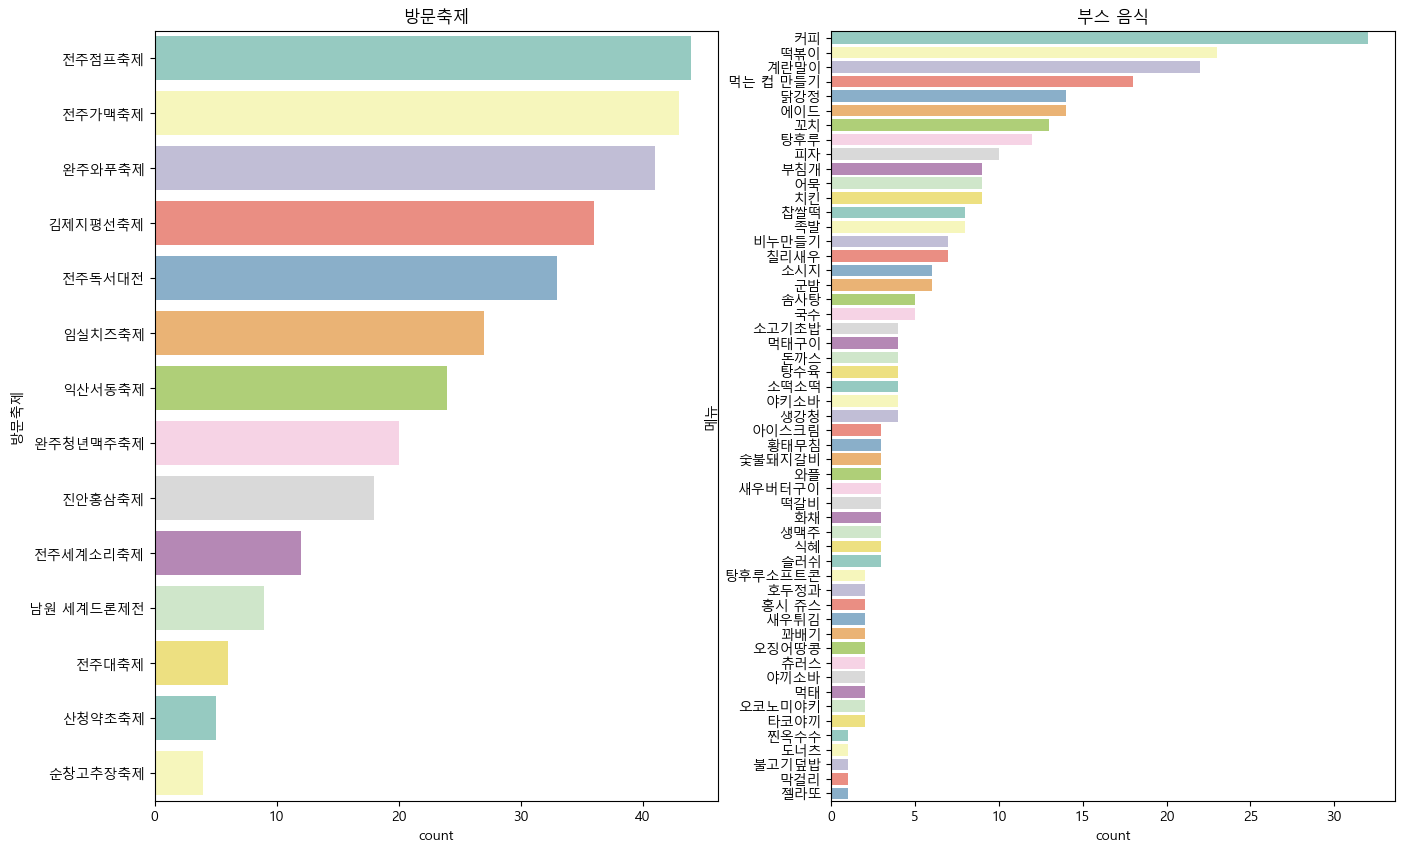

In [149]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(data=new_trash_data, y='방문축제', order=new_trash_data['방문축제'].value_counts().index, palette='Set3')
ax1.set_title('방문축제')

# 부스 음식 종류 데이터에 대한 그래프
plt.subplot(1, 2, 2)
sns.countplot(data=new_trash_data, y='메뉴', order=new_trash_data['메뉴'].value_counts().index, palette='Set3')
plt.title('부스 음식')


plt.show()

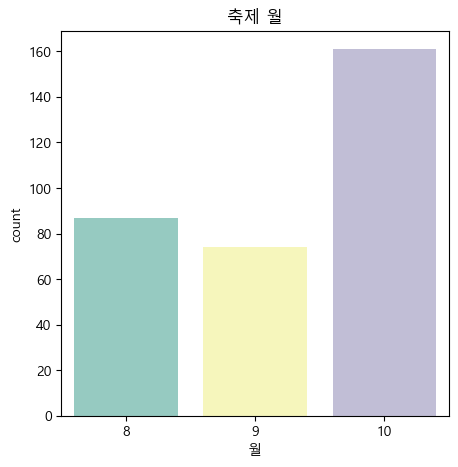

In [150]:
#날짜 시각화
new_trash_data['날짜'] = pd.to_datetime(new_trash_data['날짜']) 
new_trash_data['월'] = new_trash_data['날짜'].dt.month
plt.figure(figsize=(5,5))
sns.countplot(data=new_trash_data, x='월', palette='Set3')
plt.title('축제 월')
plt.show() 

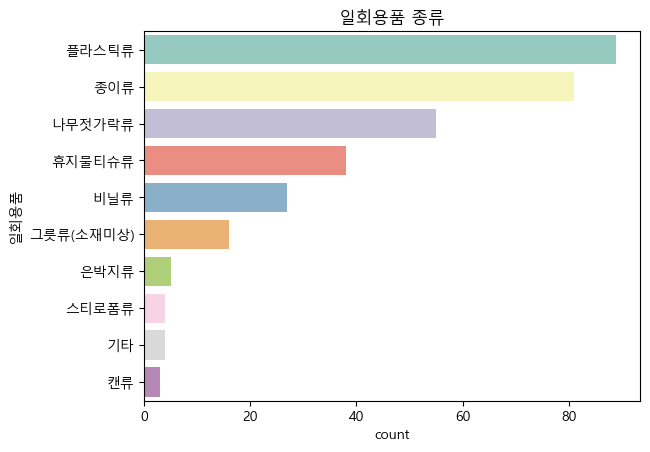

In [151]:
#일회용품
sns.countplot(data=new_trash_data, y='일회용품', order = new_trash_data['일회용품'].value_counts().index, palette='Set3')
plt.title('일회용품 종류')
plt.show() 

In [152]:
#부스 카테고리화
new_trash_data['메뉴'].unique() #또다른 목적이 생긴다면 카테고리화를 다시 해서 분석할 수 있을 것임

array(['새우튀김', '피자', '찹쌀떡', '에이드', '화채', '소떡소떡', '칠리새우', '야키소바', '오코노미야키',
       '먹태', '계란말이', '먹태구이', '황태무침', '떡볶이', '치킨', '닭강정', '커피', '야끼소바',
       '젤라또', '꼬치', '군밤', '생맥주', '새우버터구이', '숯불돼지갈비', '생강청', '어묵', '족발',
       '츄러스', '아이스크림', '부침개', '막걸리', '국수', '와플', '솜사탕', '떡갈비', '오징어땅콩',
       '불고기덮밥', '탕수육', '돈까스', '꽈배기', '식혜', '슬러쉬', '찐옥수수', '도너츠', '홍시 쥬스',
       '탕후루', '소시지', '호두정과', '소고기초밥', '비누만들기', '먹는 컵 만들기', '탕후루소프트콘',
       '타코야끼'], dtype=object)

평균 :  5.322670807453417


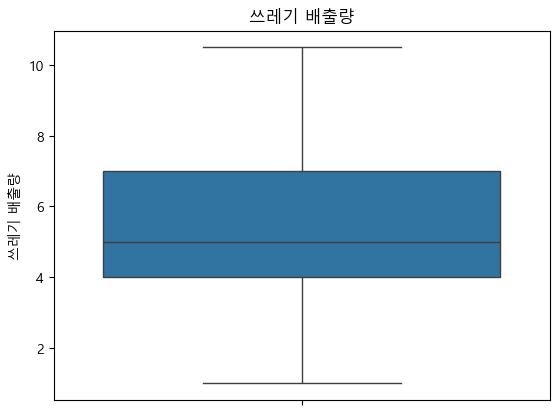

In [153]:
#쓰레기 배출량 평균
print("평균 : ", new_trash_data['쓰레기 배출량'].mean())

sns.boxplot(new_trash_data['쓰레기 배출량'])
plt.title('쓰레기 배출량')
plt.show() 

### [시민모니터링 사후 질문 데이터 원 질문] 
- 데이터명 : monitoring_data
- 열을 간소하기 위해 엑셀 수정하여 데이터 불러옴
<br></br>
1) 전체소감 - 다회용기로 축제를 즐기는 것이 어땠나요?
2) 불가피한 쓰레기 배출 종류 - 쓰레기를 줄이려고 노력을 하였지만 불가피하게 생산하게 된 쓰레기가 있다면 적어주세요.(없으면 없다고 적어주시면됩니다.)
3) 다회용기 없을 경우 예상 쓰레기 배출량 - 다회용기/텀블러 등이 없다면 여러분은 몇 개의 쓰레기를 생산했을까요?
4) 축제 쓰레기양 소감 - 시민참여단으로서 축제의 쓰레기를 확인해본 결과, 축제에서 생산되는 쓰레기 양이 어떠한 거 같나요?
5) 쓰레기 감축 가능성 - 축제에서 발생한 쓰레기양을 줄일 수 있을까요?
6) 축제 측 노력인지 - 축제 주최측이 노력한 친환경적인 부분이 있었나요?
7) 노력 주체 - 친환경 축제를 위하여 누구의 노력이 가장 중요한가요?
8) 평가 - 축제에 대한 환경과 관련된 전반적인 평가를 해주세요
9) 제안 - 마지막-! 시민참여단에 참여한 소감과 쓰레기없는축제를위한전북시민공동행동에 하고 싶은 말 혹은 제안사항

In [154]:
monitoring_data = pd.read_excel("C:/Users/sori4/Downloads/포폴작성/모니터링단 사후질문지.xlsx")
monitoring_data.head()

,타임스탬프,활동명,방문축제,방문날짜,전체소감,불가피한 쓰레기 배출 종류,다회용기 없을 경우 예상 쓰레기 배출량,축제 쓰레기양 소감,쓰레기 감축 가능성,축제 측 노력인지,노력 주체,평가,제안
0,2023-08-12 23:20:02.126,소해진,jump,2023-08-11,실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.,없다,2개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",재활용 부스 2개 운영,정부/국회의 법 제/개정 및 환경부의 제도개선의 노력,일회용품이 너무 많음. 다회용기 씻을곳 부족. 출입구 앞 쓰레기통이 산더미였음,고생많으십니다. 일회용품이 단시간에 지나치게 많이 사용된다는 걸 눈으로 보니 앞으로...
1,2023-08-13 17:34:38.906,감윤지,전주 얼티밋 뮤직 페스티벌 8.13,2023-08-13,실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.,휴지,4개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",NaN,축제를 진행하는 행사운영회사 및 담당자의 노력,"정수기가 행사장 밖에 위치해 있어 접근성이 떨어졌고, 일회용품 사용 비율이 다회용기...",없습니다
2,2023-08-13 18:31:22.785,김슬기,2023 전주 얼티밋 뮤직 페스티벌,2023-08-13,"실제 해보니 생각보다 어렵지만, 다음에도 할 수 있을 것 같다.",스텐 텀블러 반입이 불가라 음료는 일회용컵에 받아야 했음,10개이상,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",없음,정부/국회의 법 제/개정 및 환경부의 제도개선의 노력,일회용품 사용이 기본이고 외부음식 반입금지라 다회용기에 음식을 싸오는 것을 장려하지...,환경에 더 관심을 가져야겠고 응원합니다!!
3,2023-08-13 19:45:36.673,장윤정,전주점프축제,2023-08-13,실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.,없다,5개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",특별히 보이지 않음,축제를 관할하는 지자체의 노력,음식 하나에도 쓰이는 일회용품이 너무 많았다. 쓰레기통도 비치는 되어있었지만 쓰레기...,"텀블러 하나, 다회용기 하나 챙기는 것으로 여러음식을 먹는 것에 쓰레기걱정없이 즐길..."
4,2023-08-13 21:41:21.949,은지,점프,2023-08-13,"실제 해보니 생각보다 어렵지만, 다음에도 할 수 있을 것 같다.",음료,2개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",NaN,축제를 진행하는 행사운영회사 및 담당자의 노력,음식이 이미 담겨서 준비되있어서 따로 달라고 하기 힘들었다,화이팅!


In [155]:
monitoring_data.shape

(85, 13)

### 1차 전처리

In [156]:
#활동명 삭제
monitoring_data.drop(columns=['활동명', '방문날짜'], inplace=True)

#날짜 데이터 수정
monitoring_data['타임스탬프'] = monitoring_data['타임스탬프'].dt.strftime('%Y-%m-%d')
monitoring_data.rename(columns = {'타임스탬프' : '날짜'}, inplace=True)

In [157]:
monitoring_data['방문축제'].unique()

array(['jump', '전주 얼티밋 뮤직 페스티벌 8.13', '2023 전주 얼티밋 뮤직 페스티벌', '전주점프축제',
       '점프', 'JUMF', '2023 JUMF', '전즈 얼티밋 뮤직 페스티벌', '점프축제', '점프 축제',
       'JUMF축제', '가맥축제', '전주가맥축제', '전주 가맥축제', '익산서동축제', '전주국제소리축제',
       '전주세계소리축제', '익산 서동축제', '완주청년맥주축제 ', '진안홍삼축제',
       '전주대 문융대×경영댜 DAY OFF THE AIR', '임실치즈축제', '임실N치즈축제', '남원 세계드론제전',
       '완주와일드푸드축제 ', '김제지평선축제 ', '완주와일드앤푸드축제', '완주와일드앤로컬푸드축제',
       '완주와일드푸드축제, 임실엔치즈축제', '임실치즈축제 ', '산청약초축제, 흥부제,세계드론축제', '완주와일드푸드축제',
       '전주 독서 대전', '전주독서대전', '전주도서대전', '전주독서대전(23.10.13(금))', '순창고추장축제',
       '완주 와일드 앤 로컬 푸드 축제', '전주독서대전 ', '완주와일ㄷ축제', '완주로컬푸드축제', '전주대학교'],
      dtype=object)

In [158]:
monitoring_data['방문축제'] = monitoring_data['방문축제'].str.strip()

# '방문축제' 열의 값을 소문자로 변경
monitoring_data['방문축제'] = monitoring_data['방문축제'].str.lower()

# '방문축제' 열의 값에 따라 다른 축제 이름으로 변경
monitoring_data.loc[monitoring_data['방문축제'].str.contains('얼티밋|점프|jumf|jump'), '방문축제'] = '전주점프축제'
monitoring_data.loc[monitoring_data['방문축제'].str.contains('와일드|로컬'), '방문축제'] = '완주와푸축제'
monitoring_data.loc[monitoring_data['방문축제'].str.contains('독서|도서'), '방문축제'] = '전주독서대전'
monitoring_data.loc[monitoring_data['방문축제'].str.contains('가맥'), '방문축제'] = '전주가맥축제'
monitoring_data.loc[monitoring_data['방문축제'].str.contains('치즈'), '방문축제'] = '임실치즈축제'

monitoring_data['방문축제'].unique()

array(['전주점프축제', '전주가맥축제', '익산서동축제', '전주국제소리축제', '전주세계소리축제', '익산 서동축제',
       '완주청년맥주축제', '진안홍삼축제', '전주대 문융대×경영댜 day off the air', '임실치즈축제',
       '남원 세계드론제전', '완주와푸축제', '김제지평선축제', '산청약초축제, 흥부제,세계드론축제', '전주독서대전',
       '순창고추장축제', '완주와일ㄷ축제', '전주대학교'], dtype=object)

In [159]:
#손으로 수정
monitoring_data['방문축제'] = monitoring_data['방문축제'].replace({'전주대 문융대×경영댜 day off the air':'전주대축제', '전주대학교': '전주대축제', '완주와일ㄷ축제':'완주와푸축제', '익산 서동축제': '익산서동축제'})

monitoring_data['방문축제'].unique()

array(['전주점프축제', '전주가맥축제', '익산서동축제', '전주국제소리축제', '전주세계소리축제', '완주청년맥주축제',
       '진안홍삼축제', '전주대축제', '임실치즈축제', '남원 세계드론제전', '완주와푸축제', '김제지평선축제',
       '산청약초축제, 흥부제,세계드론축제', '전주독서대전', '순창고추장축제'], dtype=object)

In [160]:
monitoring_data.head()

,날짜,방문축제,전체소감,불가피한 쓰레기 배출 종류,다회용기 없을 경우 예상 쓰레기 배출량,축제 쓰레기양 소감,쓰레기 감축 가능성,축제 측 노력인지,노력 주체,평가,제안
0,2023-08-12,전주점프축제,실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.,없다,2개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",재활용 부스 2개 운영,정부/국회의 법 제/개정 및 환경부의 제도개선의 노력,일회용품이 너무 많음. 다회용기 씻을곳 부족. 출입구 앞 쓰레기통이 산더미였음,고생많으십니다. 일회용품이 단시간에 지나치게 많이 사용된다는 걸 눈으로 보니 앞으로...
1,2023-08-13,전주점프축제,실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.,휴지,4개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",NaN,축제를 진행하는 행사운영회사 및 담당자의 노력,"정수기가 행사장 밖에 위치해 있어 접근성이 떨어졌고, 일회용품 사용 비율이 다회용기...",없습니다
2,2023-08-13,전주점프축제,"실제 해보니 생각보다 어렵지만, 다음에도 할 수 있을 것 같다.",스텐 텀블러 반입이 불가라 음료는 일회용컵에 받아야 했음,10개이상,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",없음,정부/국회의 법 제/개정 및 환경부의 제도개선의 노력,일회용품 사용이 기본이고 외부음식 반입금지라 다회용기에 음식을 싸오는 것을 장려하지...,환경에 더 관심을 가져야겠고 응원합니다!!
3,2023-08-13,전주점프축제,실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.,없다,5개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",특별히 보이지 않음,축제를 관할하는 지자체의 노력,음식 하나에도 쓰이는 일회용품이 너무 많았다. 쓰레기통도 비치는 되어있었지만 쓰레기...,"텀블러 하나, 다회용기 하나 챙기는 것으로 여러음식을 먹는 것에 쓰레기걱정없이 즐길..."
4,2023-08-13,전주점프축제,"실제 해보니 생각보다 어렵지만, 다음에도 할 수 있을 것 같다.",음료,2개,축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.,"여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.",NaN,축제를 진행하는 행사운영회사 및 담당자의 노력,음식이 이미 담겨서 준비되있어서 따로 달라고 하기 힘들었다,화이팅!


### 카테고리화 가능한 열

In [161]:
monitoring_data['축제 쓰레기양 소감'].unique()

array(['축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.', '축제에서 생산되는 쓰레기 양이 조금 많은 것 같다.',
       '축제에서 생산되는 쓰레기 양은 보통이다.', '축제에서 생산되는 쓰레기 양이 정말 적은 것 같다.',
       '축제에서 생산되는 쓰레기 양이 조금 적은 것 같다.'], dtype=object)

In [162]:
monitoring_data['축제 쓰레기양 소감'] = monitoring_data['축제 쓰레기양 소감'].replace({'축제에서 생산되는 쓰레기 양이 정말 많은 것 같다.':1, '축제에서 생산되는 쓰레기 양이 조금 많은 것 같다.':2, '축제에서 생산되는 쓰레기 양은 보통이다.':3, 
                                       '축제에서 생산되는 쓰레기 양이 정말 적은 것 같다.':4, '축제에서 생산되는 쓰레기 양이 조금 적은 것 같다.':5})

In [163]:
monitoring_data['쓰레기 감축 가능성'].unique()

array(['여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.',
       '여러 측면에서 노력하여도, 현재의 축제의 쓰레기보다 더 줄일 수 없을 것이라 생각한다.'], dtype=object)

In [164]:
monitoring_data['쓰레기 감축 가능성'] = monitoring_data['쓰레기 감축 가능성'].replace({'여러 측면에서 노력한다면, 현재의 축제의 쓰레기보다 더 줄일 수 있다고 생각한다.' : 'Y', 
                                                                       '여러 측면에서 노력하여도, 현재의 축제의 쓰레기보다 더 줄일 수 없을 것이라 생각한다.' : 'N'})

In [165]:
monitoring_data['노력 주체'].unique() #일단 짧게 출약하기

array(['정부/국회의 법 제/개정 및 환경부의 제도개선의 노력', '축제를 진행하는 행사운영회사 및 담당자의 노력',
       '축제를 관할하는 지자체의 노력', '축제에 참여하는 시민들의 노력', '축제에서 부스를 운영하는 가게 등의 노력',
       '위 답변 중에서 모든것이 중요하다'], dtype=object)

In [166]:
monitoring_data['노력 주체'] = monitoring_data['노력 주체'].replace({'정부/국회의 법 제/개정 및 환경부의 제도개선의 노력': '제도', 
                                                             '축제를 관할하는 지자체의 노력': '지자체', '축제에 참여하는 시민들의 노력': '시민참여', 
                                                             '축제에서 부스를 운영하는 가게 등의 노력': '부스운영자', '축제를 진행하는 행사운영회사 및 담당자의 노력': '행사추죄', '위 답변 중에서 모든것이 중요하다': '모두'})

In [167]:
monitoring_data['전체소감'].unique()

array(['실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.',
       '실제 해보니 생각보다 어렵지만, 다음에도 할 수 있을 것 같다.', '기존에도 계속 하던 것이라 어렵지 않았다.',
       '실제 해보니 생각보다 어려워서 다음에는 못 할 것 같다.'], dtype=object)

In [168]:
monitoring_data['전체소감'] = monitoring_data['전체소감'].replace({'기존에도 계속 하던 것이라 어렵지 않았다.' : 4,
                                                           '실제 해보니 생각보다 어렵지 않아서 다음에도 쉽게 할 수 있을 것 같다.': 3,
                                                           '실제 해보니 생각보다 어렵지만, 다음에도 할 수 있을 것 같다.' : 2, '실제 해보니 생각보다 어려워서 다음에는 못 할 것 같다.': 1})

In [169]:
monitoring_data['축제 쓰레기양 소감'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [170]:
#의미를 알 수 없는 '축제 쓰레기양 소감' 과 결측치가 많고 불필요하다고 판단한 '방문날짜'를 삭제한다
# monitoring_data.drop(columns=['축제 쓰레기양 소감'], inplace=True)

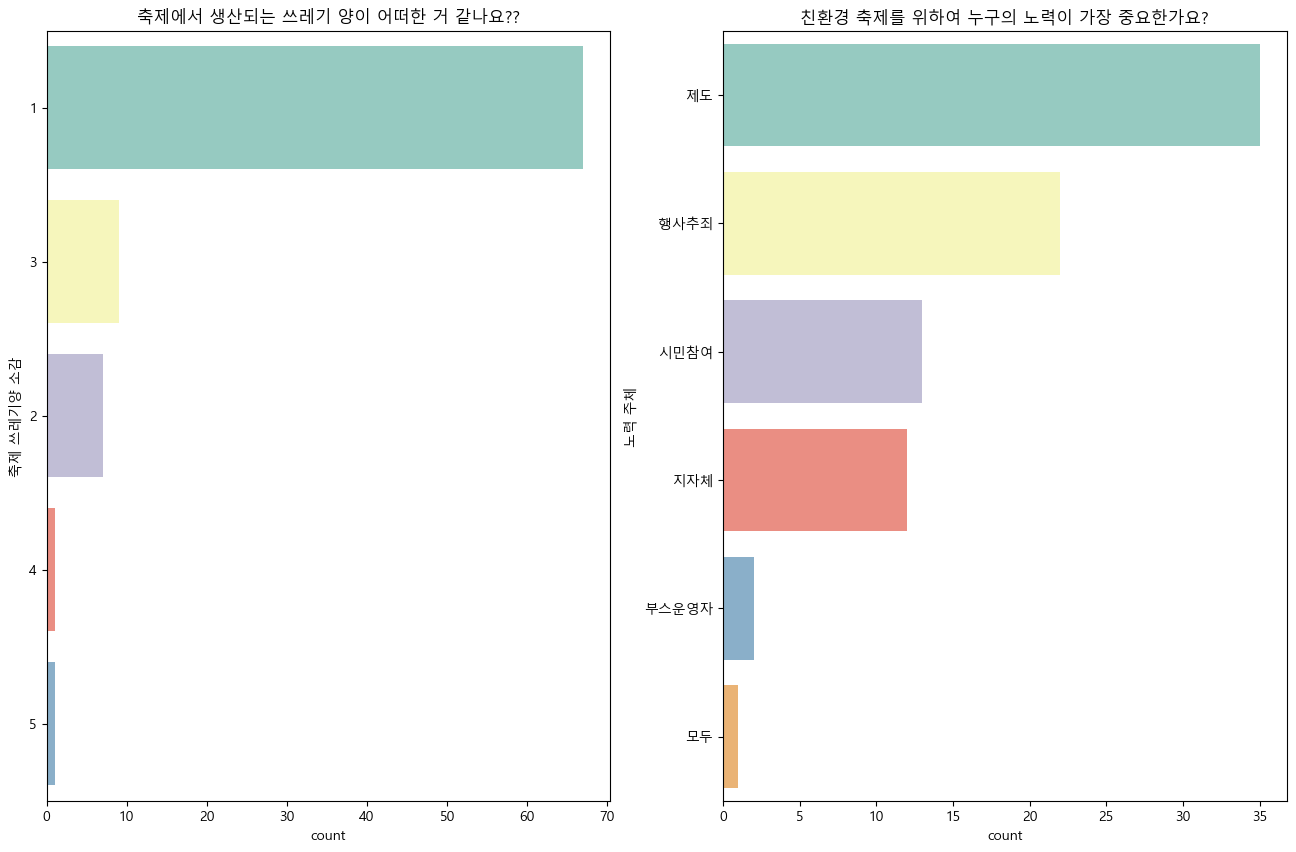

In [171]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(data=monitoring_data, y='축제 쓰레기양 소감', order=monitoring_data['축제 쓰레기양 소감'].value_counts().index, palette='Set3')
ax1.set_title('축제에서 생산되는 쓰레기 양이 어떠한 거 같나요??')

# 노력
plt.subplot(1, 2, 2)
sns.countplot(data=monitoring_data, y='노력 주체', order=monitoring_data['노력 주체'].value_counts().index, palette='Set3')
plt.title('친환경 축제를 위하여 누구의 노력이 가장 중요한가요?')


plt.show()

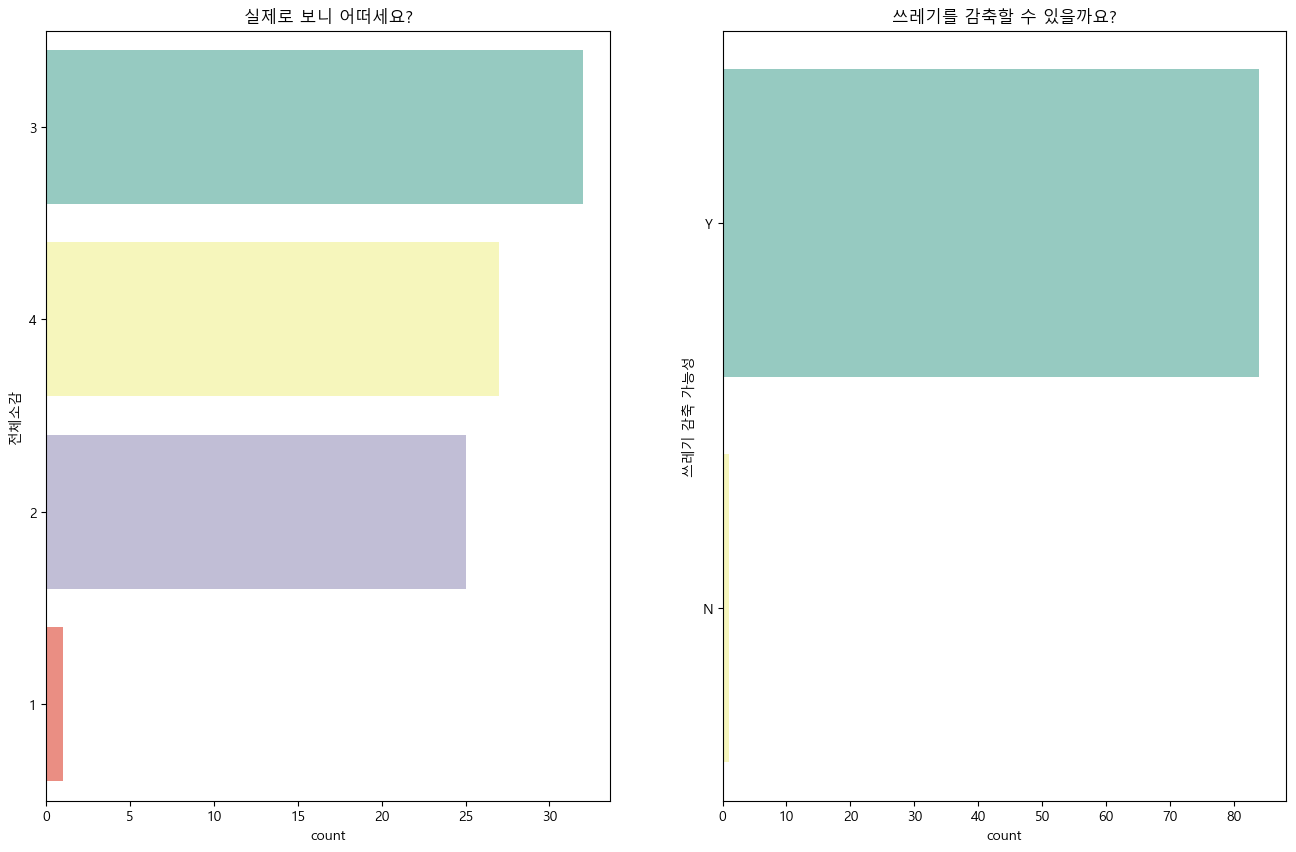

In [172]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(data=monitoring_data, y='전체소감', order=monitoring_data['전체소감'].value_counts().index, palette='Set3')
ax1.set_title('실제로 보니 어떠세요?')

# 부스 음식 종류 데이터에 대한 그래프
plt.subplot(1, 2, 2)
sns.countplot(data=monitoring_data, y='쓰레기 감축 가능성', order=monitoring_data['쓰레기 감축 가능성'].value_counts().index, palette='Set3')
plt.title('쓰레기를 감축할 수 있을까요?')


plt.show()

In [173]:
monitoring_data['쓰레기 감축 가능성'].value_counts(1)

Y    0.988235
N    0.011765
Name: 쓰레기 감축 가능성, dtype: float64

In [174]:
monitoring_data['노력 주체'].value_counts(1)

제도       0.411765
행사추죄     0.258824
시민참여     0.152941
지자체      0.141176
부스운영자    0.023529
모두       0.011765
Name: 노력 주체, dtype: float64

### 2차 전처리 : 자연어 처리

- '다회용기 없을 경우 예상 쓰레기 배출량' : drop
- '불가피한 쓰레기 배출 종류' : col1
- '축제 측 노력인지' : col2
- '평가' : col3
- '제안' : col4

In [175]:
from nltk.tokenize import word_tokenize
from konlpy.tag import Komoran, Hannanum
from collections import Counter

ko = Komoran()
han = Hannanum()

In [176]:
#불용어 설정
stop_words = ['때', '그', '게', '뿐', '이', '저', '난', '데', '등', '개', '번']

In [177]:
monitoring_data = monitoring_data.fillna('없음')

- word_tokenize : 문자열을 단어 단위로 토큰화하는 기능 제공 (단어 단위로 쪼개는 역할)
- hannanum.morphs : 한국어 텍스트를 형태소 단위로 분리.

In [178]:
monitoring_data['다회용기 없을 경우 예상 쓰레기 배출량'].unique() #NLP로 처리

array(['2개', '4개', '10개이상', '5개', '6개',
       '맥주나 음료로 플라스틱 3-4개. 생수로 3-4병 추가로 발생.', '물병 3개, 일회용 접시 1개',
       '많이 썼을거같다', '3개', 4, '-', '없음', '1~7개', '여러개',
       '5개 가량의 쓰레기를 생산했을것이나.', '나무젓가락 1세트, 안주 접시1개, 맥주잔1개', '1개',
       '종이그릇 2, 일회용접시 2', '7개', '20개 이상입니다', '담는 일회용 용기 한 개가 생산됐을 것이다.',
       '다회용기와 텀블러가 없었다면 못해도 10개 이상, 약 15~20개 정도의 쓰레기를 생산했을 것 같아요. 음료 한 잔만 주문해도 벌써 5개의 쓰레기가 기본이니까요ㅠ',
       '5개 ',
       '5개에서 10개 사이(식음료 2~3잔 마시고 식사나 간식 1~2종류 먹는다고 정하면 1종류당 2개정도 쓰레기 나온다고 감안할때)',
       '생수페트, 물컵, 꼬치 총 3개 ', '4개 ( 젓가락, 접시,텀블러,냅킨)', '10개 이상', '함 10?',
       '담을 용기로1개', '텀블러가 없었다면 4개의 쓰레기 생산했을 것', '5~6개', '0개', '8개'],
      dtype=object)

In [179]:
#예상쓰레기 배출량인데, 기준이 불분명해 사용할 수 없어 삭제
monitoring_data.drop(columns='다회용기 없을 경우 예상 쓰레기 배출량', inplace=True)

In [180]:
monitoring_data['불가피한 쓰레기 배출 종류'].unique() #NLP로 처리

array(['없다', '휴지', '스텐 텀블러 반입이 불가라 음료는 일회용컵에 받아야 했음', '음료',
       '다른 사람이 사다주는 메뉴, 동시에 주문한 메뉴는 불가피하게 쓰레기 발생. 생수는 전부 페트병에 판매했음으로 쓰레기 줄일 수 있는 대안 없음. 특히 무료로 나눠주는 부채, 프로그램북 등은 의지와 상관없이 쓰레기 발생',
       '맥주컵, 일회용접시, 나무젓가락', '맥주컵', '없음',
       '맥주용 텀블러를 가져갔는데, 안된다고 해서 맥주용 일회용컵 사용', '맥주잔, 페트병', '맥주잔', 0, '-',
       '과자봉지', '아는분들이 자리하고 있다해서 갔는데, 일회용기로 음식을 받아둔 상태였습니다. 같이 먹었습니다..',
       '생수병', '깨소금 포장지', '무료나눔콤부차 병, 물티슈', '아이가 먹은 과자봉지', '아이스크림 컵',
       '새우껍질', '종이그릇( 키트에 다른음식을 담아두었던 상태에서 추가적으로 주문하게되어 생김)',
       '트래쉬버스터즈라는 업체가 있어 다회용기에 음식이 나오는줄 알고 주문을 했는데, 업체에서 임의적으로 일회용품을 사용하여 종이용기 쓰레기가 발생했습니다',
       '입장 팔찌, 종이컵과 플라스틱 수저', '점심먹고 물을 마셨는데 종이컵을 쓰게되었다.하지만 재활용할 생각입니다.',
       '비가 많이 내리는 날이었는데 아이들이 발을 닦고 싶어해서 휴지를 몇 장 사용했어요. 손수건이 있었지만 손수건으로 발을 닦고 얼굴을 닦고싶지 않다고해서요.',
       '휴지를 씀', '없다.', '소스통', '탕후루 꼬지', '물티슈', '꼬지', '탕후루꼬지', '슬러쉬용기',
       '쓰레기통에 잘 버렸어요', '없어요', '생수 ',
       '상인분이 습관적으로 미리 세팅해서 주는 쓰레기 예를들어 탕후루의 경우 설탕물이 흐르지 않도록 종이컵 밑에 화장지를 습관적으로 대 주시는데 거절할 사이도 없이 이미 진행돼버림',
       '생수페트, 나

In [181]:
for idx, value in monitoring_data['불가피한 쓰레기 배출 종류'].iteritems():
    if isinstance(value, int):
        print(f"정수 값을 가진 행: index={idx}, value={value}")

정수 값을 가진 행: index=15, value=0
정수 값을 가진 행: index=28, value=0


In [182]:
monitoring_data.loc[15, '불가피한 쓰레기 배출 종류'] = '없음'
monitoring_data.loc[28, '불가피한 쓰레기 배출 종류'] = '없음'

In [183]:
#다회용기 없을 경우 예상 쓰레기 배출량
col1_noun = []

for idx, row in monitoring_data.iterrows():
    for noun in han.nouns(row['불가피한 쓰레기 배출 종류']):
        if noun not in stop_words:
            col1_noun.append(noun)

In [184]:
Counter(col1_noun).items()

dict_items([('휴지', 5), ('스텐', 1), ('텀블러', 3), ('반입', 1), ('불가', 1), ('음료', 2), ('일회용컵', 3), ('사람', 1), ('메뉴', 2), ('주문한', 1), ('불가피하', 1), ('쓰레기', 5), ('발생', 3), ('생수', 3), ('페트병', 4), ('판매', 1), ('줄', 2), ('수', 1), ('대안', 1), ('무료', 1), ('부채', 1), ('프로그램북', 1), ('의지', 1), ('맥주컵', 2), ('일회용접시', 1), ('나무젓가락', 2), ('맥주용', 4), ('사용', 5), ('맥주잔', 5), ('과자봉지', 4), ('아는분들', 1), ('자리', 1), ('있다해', 1), ('일회용기', 1), ('음식', 2), ('상태', 2), ('생수병', 2), ('깨소금', 2), ('포장지', 2), ('무료나눔콤부차', 1), ('병', 1), ('물티슈', 3), ('아이', 2), ('아이스크림', 2), ('컵', 1), ('새우껍질', 2), ('종이그릇(', 1), ('키트', 1), ('다른음식', 1), ('추가적', 1), ('주문', 2), ('생김', 1), ('트래쉬버스터즈라', 1), ('업체', 2), ('다회용기', 1), ('임의적', 1), ('일회용품', 1), ('종이용기', 1), ('입장', 1), ('팔찌', 1), ('종이컵', 3), ('플라스틱', 1), ('수저', 1), ('점심먹', 1), ('물', 2), ('재활용할', 1), ('생각', 1), ('비', 1), ('날', 1), ('아이들', 1), ('발', 2), ('몇', 1), ('장', 1), ('손수건', 2), ('얼굴', 1), ('소스통', 1), ('탕후루', 4), ('탕후루꼬', 1), ('슬러쉬용기', 1), ('쓰레기통', 1), ('상', 1), ('분', 1), ('습관적', 2), ('세팅해', 1

In [185]:
col1_df = pd.DataFrame(Counter(col1_noun).items(), columns=['Word', 'Count'])
col1_df = col1_df[col1_df['Count'] >= 2]
col1_df = col1_df.sort_values(by = 'Count',ascending=False).reset_index(drop=True)

In [186]:
#맥주랑 맥주용을 어떻게 통일 시킬 수 있을 까? 같은 말인데
#수동으로 일단 진행
col1_df = col1_df[~(col1_df['Word'].str.len() == 1)]
col1_df.loc[col1_df['Word'].str.contains('맥주'), 'Word'] = '맥주잔'

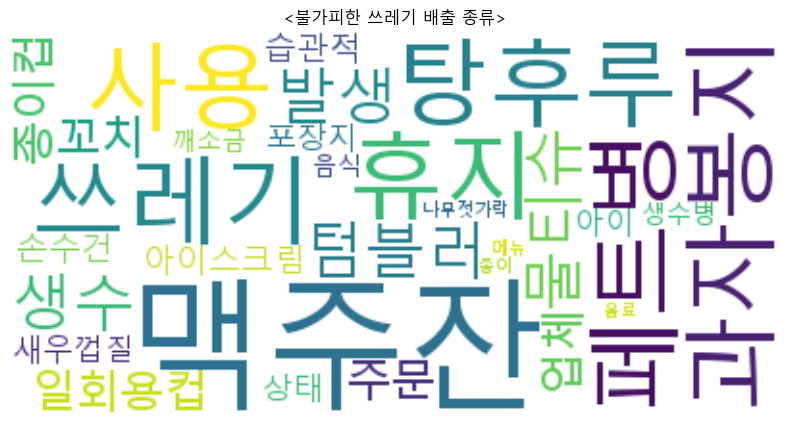

In [187]:
# 워드 클라우드 생성
from wordcloud import WordCloud
text = ' '.join(col1_df['Word'])
wordcloud = WordCloud(font_path='malgun.ttf', background_color='white').generate(text)

# 워드 클라우드를 이미지로 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('<불가피한 쓰레기 배출 종류>')
plt.axis('off')
plt.show()

In [188]:
#윗 내용 함수화
def making_wc_df(df, col):
    list = []

    #불용어 체크
    for idx, row in df.iterrows():
        for noun in han.nouns(row[col]):
            if noun not in stop_words:
                list.append(noun)
    
    #데이터 프레임 생성성
    col1_df = pd.DataFrame(Counter(list).items(), columns=['Word', 'Count'])
    col1_df = col1_df[col1_df['Count'] >= 2]
    col1_df = col1_df.sort_values(by = 'Count',ascending=False).reset_index(drop=True)
    col1_df = col1_df[~(col1_df['Word'].str.len() == 1)] #한글자인 것은 삭제

    return col1_df

def making_wc_pl(df, col_name):
    #워드클라우드 생성
    text = ' '.join(df['Word'])
    wordcloud = WordCloud(font_path='malgun.ttf', background_color='white').generate(text)

    # 워드 클라우드를 이미지로 표시
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'<{col_name}>')
    plt.axis('off')
    plt.show()


In [189]:
monitoring_data['축제 측 노력인지'].unique()

array(['재활용 부스 2개 운영', '없음', '특별히 보이지 않음', '잘 보이지 않았다',
       '잘 모르겠다. 형식적인 분리수거.', '음식물쓰레기 등 쓰레기 분리수거',
       '식기 접시등 여러분야에 걸쳐서 친환경적으로 사용했다', '분리배출에 인력 배치',
       '모두 다 일회용품으로 구성되어있어서 어떤 노력을 했는지 모르겠습니다.',
       '특별히 보여지는 부분이 없어서 잘 모르겠다', '.', '아니오, 분리 배출하지 않습니다.', '다용회기',
       '맥주 다회용 컵', '네', '텀블러를 챙겨오면 입장료 없이 즐길 수 있도록 했다.',
       '텀블러를 가져오면 무료입장이 되었다.',
       '컵이 다회용기였고, 입장할 때 입장료가 있었는데 텀블러를 갖고 오면 그게 공짜여서 좋았다. 다른 사람들도 텀블러 갖고 온 사람들이 보였다.',
       '다회용컵', '다회용컵 그거 한개 정도...', '다회용기컵 사용, 환경적 홍보, 분리수거', '분리수거',
       '다회용 용기 사용', '음식부스에 다회용기를 준비하도록 지침을 줌.', '곳곳에 분리수거함을 설치해두셨어요',
       '분리수거장에 인원이 배치됨', '맥주를 담는 통을 철제용기로 재활용하였다',
       '맥주를 담는 용기를 다회용으로 하였지만 그외에 모든 제품이 일회용이었다',
       '1. 전동기를 타고 다니시면서 쓰레기를 수거하심\n2. 분리수거장이 깔끔했고, 정말 많은곳에 있었음\n3. 다회용기사용업체(?)와의 협업으로, 먹거리존에서 대부분 다회성용기를 사용하고있었음\n4. 플로깅행사를 진행하고, 적극참여하도록 유도하였음',
       '플로깅 (쓰레기줍기) , 트래쉬버스터즈라는 다회용기 업체를 고용, 분리수거장 청결하게 유지 및 관리', '없었다',
       '친환경부스', '친환경부스를 설치해 업사이클을 체험할 수 있게 했다.', '애석하지만 전혀 보이지 않았어요ㅠ',
       '분리수거함이 

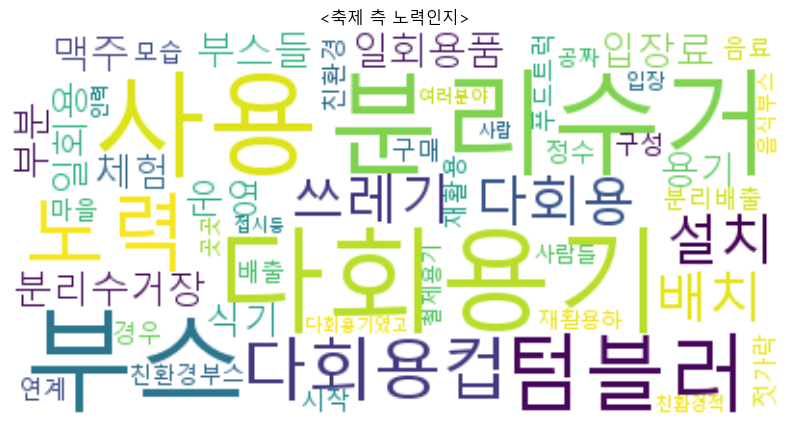

In [190]:
df_wc1 = making_wc_df(monitoring_data, '축제 측 노력인지')
making_wc_pl(df_wc1, '축제 측 노력인지')

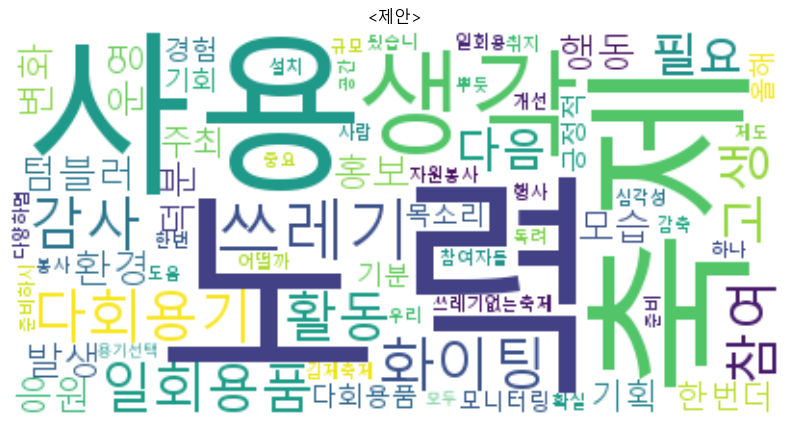

In [191]:
df_wc2 = making_wc_df(monitoring_data, '제안')
making_wc_pl(df_wc2, '제안')

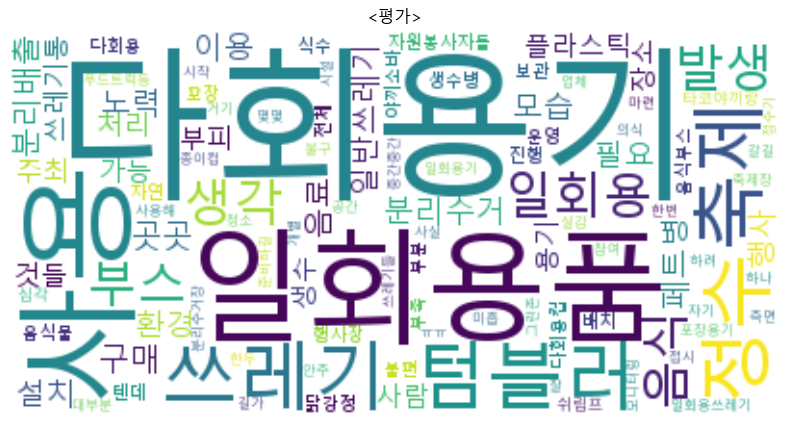

In [192]:
df_wc3 = making_wc_df(monitoring_data, '평가')
making_wc_pl(df_wc3, '평가')

### 트리맵 그리기

In [193]:
#트리맵 그리기
import matplotlib.pyplot as plt
import squarify

def draw_treemap(df, name=None):
    # 데이터프레임에서 Word와 Count 열을 따로 추출
    labels = df['Word']
    sizes = df['Count']

    # 색상 설정을 위한 정규화 및 컬러맵 생성
    norm = plt.Normalize(vmin=sizes.min(), vmax=sizes.max())
    colors = plt.cm.Greens(norm(sizes))

    # 트리맵 그리기
    plt.rcParams['font.size'] = 12  # 폰트 크기 설정
    plt.figure(figsize=(10, 10))
    squarify.plot(label=labels, sizes=sizes, color=colors, alpha=0.7)
    plt.axis('off')  # 축 제거
    if name:
        plt.title(f'<{name}>')
    plt.show()

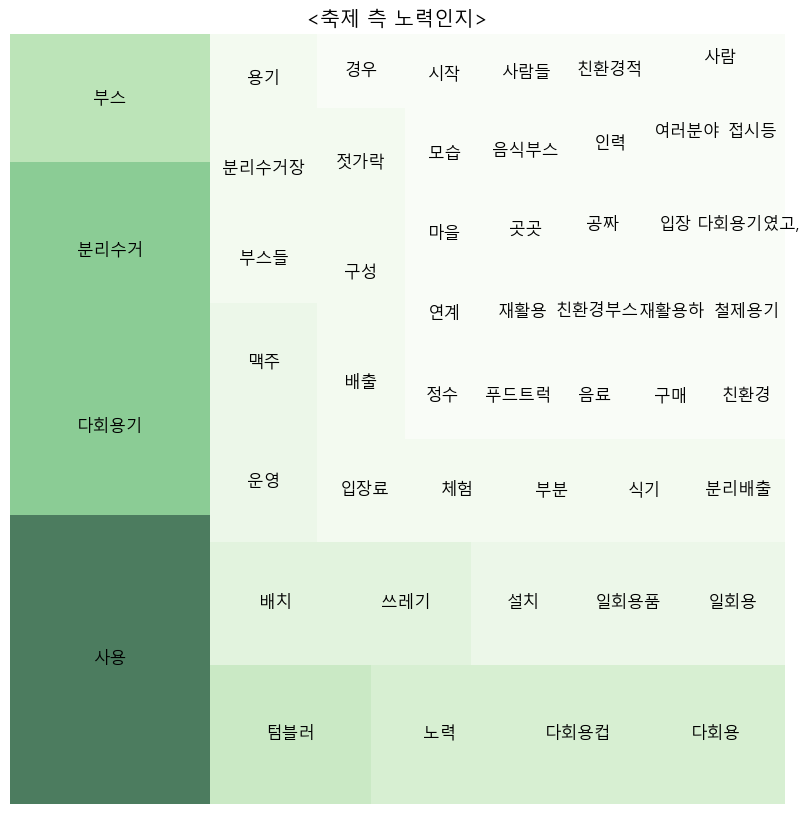

In [194]:
draw_treemap(df_wc1, '축제 측 노력인지')

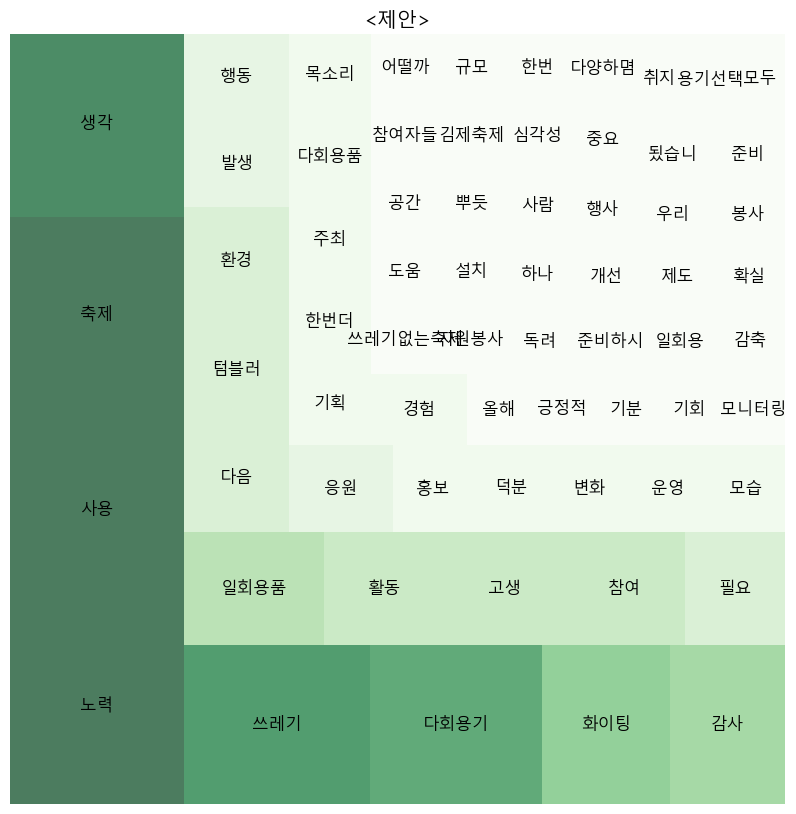

In [195]:
draw_treemap(df_wc2, '제안')

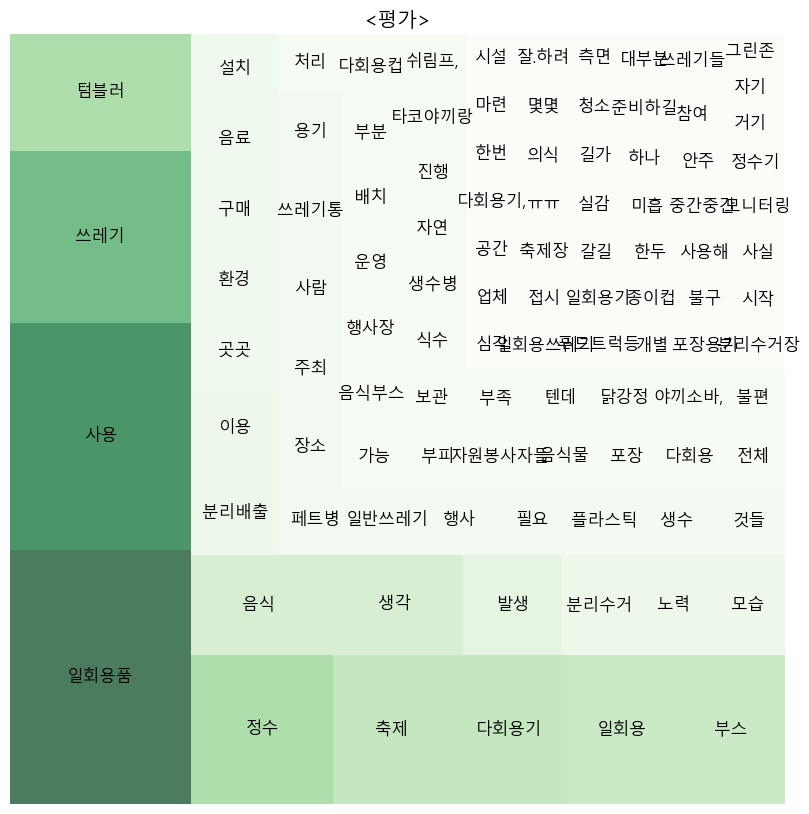

In [196]:
draw_treemap(df_wc3, '평가')

### 감성분석

* 특성추출 :
단어 빈도(term frequency), TF-IDF(Term Frequency-Inverse Document Frequency), 워드 임베딩(word embedding


* 모델학습 : 지도 학습 알고리즘인 나이브 베이즈(Naive Bayes), 서포트 벡터 머신(Support Vector Machine), 랜덤 포레스트(Random Forest)

* 평가 : 학습된 모델을 평가하고 필요에 따라 모델 튜닝, 일반화 성능 향상

- 적용 및 결과 해석 : 새로운 텍스트 데이터에 적용

## 워드클라우드

## 연관분석

연관분석은 데이터 집합에서 항목 간의 관련성을 찾아내는 데이터 마이닝 기법 중 하나
- Apriori 알고리즘
- FP-Growth 알고리즘
- ECLAT 알고리즘

### 어떤 음식을 많이 팔면 쓰레기가 유의미하게 적게 나올지 예측

하고 싶지만 데이터가 너무 적고

워드클라우드 키워드는 뽑아내었지만, '사용'단어가 많이 나왔지만 무엇을 사용했다는 것인지 등을 파악하기에는 어려워서 워드클라우드는 적합하지 않았다. 그 맥락이 잘 보이지 않아서 아쉬웠다.